In [6]:
import sys
!{sys.executable} -m pip install geopandas


In [8]:
import sys
!{sys.executable} -m pip install matplotlib --upgrade

  Found existing installation: matplotlib 3.0.2
    Uninstalling matplotlib-3.0.2:
      Successfully uninstalled matplotlib-3.0.2


In [35]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [20]:
import sys
!{sys.executable} -m pip install setuptools==40.6.3

  Using cached https://files.pythonhosted.org/packages/37/06/754589caf971b0d2d48f151c2586f62902d93dc908e2fd9b9b9f6aa3c9dd/setuptools-40.6.3-py2.py3-none-any.whl
  Found existing installation: setuptools 41.0.0
    Uninstalling setuptools-41.0.0:
      Successfully uninstalled setuptools-41.0.0


In [25]:
import fiona.crs 

In [23]:
# Filepaths
grid_fp = r"C:\Users\lilyx\Desktop\dataE5\TravelTimes_to_5975375_RailwayStation.shp"
roads_fp = r"C:\Users\lilyx\Desktop\dataE5\roads.shp"
metro_fp = r"C:\Users\lilyx\Desktop\dataE5\metro.shp"

# Read files
grid = gpd.read_file(grid_fp)
roads = gpd.read_file(roads_fp)
metro = gpd.read_file(metro_fp)

In [10]:
grid.head(3)

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,geometry
0,32297,43,32260,48,5785640,32616,116,147,32616,108,139,5975375,32164,459,"POLYGON ((382000.0001358641 6697750.000038058,..."
1,32508,43,32471,49,5785641,32822,119,145,32822,111,133,5975375,29547,422,"POLYGON ((382250.0001358146 6697750.000038053,..."
2,30133,50,31872,56,5785642,32940,121,146,32940,113,133,5975375,29626,423,"POLYGON ((382500.0001357661 6697750.000038046,..."


In [27]:
from fiona.crs import from_epsg

In [37]:
import os
import gdal
import geopandas as gpd

# Filepaths
grid_fp = os.path.join(os.path.abspath('Desktop\dataE5'), "TravelTimes_to_5975375_RailwayStation.shp")
roads_fp = os.path.join(os.path.abspath('Desktop\dataE5'), "roads.shp")
metro_fp = os.path.join(os.path.abspath('Desktop\dataE5'), "metro.shp")

# Read files
grid = gpd.read_file(grid_fp)
roads = gpd.read_file(roads_fp)
metro = gpd.read_file(metro_fp)

In [39]:
roads.head(3)

,NIMI,NIMI0,NRO,MTRYHM,geometry
0,Moottoriväylä,Porvoon väylä,1,80,LINESTRING (2559971.273352734 6682910.73006964...
1,Moottoriväylä,Kehä III,1,80,LINESTRING (2564301.75712334 6681430.171351024...
2,Moottoriväylä,Kehä III,1,80,LINESTRING (2562487.932861299 6683444.46217558...


In [40]:


crs = from_string("+proj=tmerc +lat_0=49 +lon_0=-2 +k=0.9996012717 +x_0=400000 +y_0=-100000 +ellps=airy +towgs84=446.448,-125.157,542.06,0.15,0.247,0.842,-20.489 +units=m +vunits=m +no_defs")
test_series.to_crs(crs=crs)


NameError: name 'from_string' is not defined

In [ ]:
# Get the CRS of the grid
gridCRS = grid.crs

# Reproject geometries using the crs of travel time grid
roads['geometry'] = roads['geometry'].to_crs(crs=gridCRS)
metro['geometry'] = metro['geometry'].to_crs(crs=gridCRS)

In [32]:
# gpd = gpd.to_crs({'init': 'epsg:4326'})

AttributeError: module 'geopandas' has no attribute 'to_crs'

ImportError: The 'mapclassify' package is required to use the 'scheme' keyword

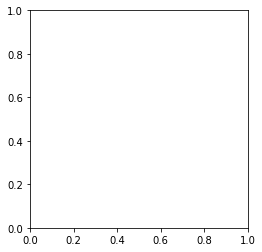

In [33]:
# Visualize the travel times into 9 classes using "Quantiles" classification scheme
# Add also a little bit of transparency with `alpha` parameter
# (ranges from 0 to 1 where 0 is fully transparent and 1 has no transparency)
my_map = grid.plot(column="car_r_t", linewidth=0.03, cmap="Reds", scheme="quantiles", k=9, alpha=0.9)

# Add roads on top of the grid
# (use ax parameter to define the map on top of which the second items are plotted)
roads.plot(ax=my_map, color="grey", linewidth=1.5)

# Add metro on top of the previous map
metro.plot(ax=my_map, color="red", linewidth=2.5)

# Remove the empty white-space around the axes
plt.tight_layout()

# Save the figure as png file with resolution of 300 dpi
outfp = r"/home/geo/data/static_map.png"
plt.savefig(outfp, dpi=300)